In [84]:
import tf as tf
from tensorflow.python.keras.layers import Dense
from keras.layers import LSTM
from tensorflow.python.keras import Sequential
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from tools import data_parser as dp
from data_visualisation import TSNE_2D_analysis as tsne
from tools import feature_selection as feat
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [85]:
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [86]:
X.columns = ['{}'.format(i) for i in range(len(X.columns))]
y = pd.DataFrame(y)
y = y.values.ravel()

In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [95]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [96]:
def create_model(X_train):
    model = Sequential()
    # add normalisation layer
    model.add(normalizer)
    model.add(LSTM(64, input_shape=(X_train.shape[0], X_train.shape[1])))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    return model

In [97]:
model = create_model(X_train)

In [98]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/200
5/5 - 2s - loss: 71.3808 - val_loss: 71.2287
Epoch 2/200
5/5 - 0s - loss: 70.8389 - val_loss: 70.7430
Epoch 3/200
5/5 - 0s - loss: 70.3680 - val_loss: 70.2777
Epoch 4/200
5/5 - 0s - loss: 69.8951 - val_loss: 69.7874
Epoch 5/200
5/5 - 0s - loss: 69.3733 - val_loss: 69.2177
Epoch 6/200
5/5 - 0s - loss: 68.7683 - val_loss: 68.5514
Epoch 7/200
5/5 - 0s - loss: 68.0559 - val_loss: 67.7615
Epoch 8/200
5/5 - 0s - loss: 67.2111 - val_loss: 66.8344
Epoch 9/200
5/5 - 0s - loss: 66.2027 - val_loss: 65.7138
Epoch 10/200
5/5 - 0s - loss: 64.9249 - val_loss: 64.2667
Epoch 11/200
5/5 - 0s - loss: 63.2429 - val_loss: 62.3778
Epoch 12/200
5/5 - 0s - loss: 61.0940 - val_loss: 60.0626
Epoch 13/200
5/5 - 0s - loss: 58.6163 - val_loss: 57.5081
Epoch 14/200
5/5 - 0s - loss: 55.9535 - val_loss: 54.8174
Epoch 15/200
5/5 - 0s - loss: 53.1758 - val_loss: 52.0649
Epoch 16/200
5/5 - 0s - loss: 50.3675 - val_loss: 49.2145
Epoch 17/200
5/5 - 0s - loss: 47.5008 - val_loss: 46.2603
Epoch 18/200
5/5 - 0s -

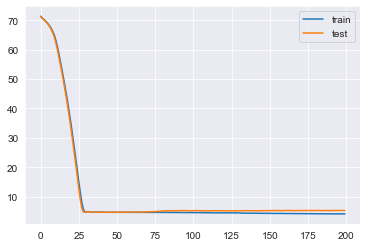

In [99]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


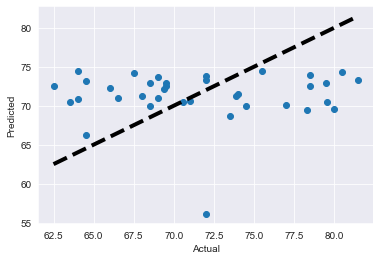

In [100]:
# plot scatter of predicted vs actual
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
# plot x=y line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [101]:
# get mae, r2 and pearson
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
pearson = pearsonr(y_test, y_pred)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)
print('Pearson: %.3f' % pearson[0])


MAE: 5.251
R2: -0.308
Pearson: 0.023


(177,)